In [99]:
#import stuff

import numpy as np
from CreateDataFunctions import *
import sklearn.decomposition as dec
import matplotlib.pyplot as plt

In [100]:
#import data

nrObservations = 1000
nrFeatures = 200
seed = 30
nrDimToKeep = 30

normalData = normal_data(nrObservations, nrFeatures, seed)
uniformData = uniform_data(nrObservations, nrFeatures, seed)
normalDataCov = normal_data_with_cov(nrObservations, nrFeatures, seed)

datasets_original = [normalData, uniformData, normalDataCov]

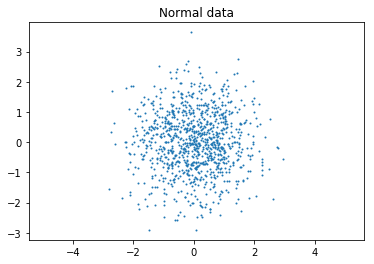

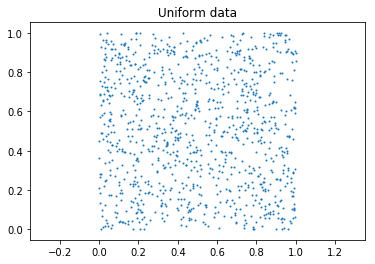

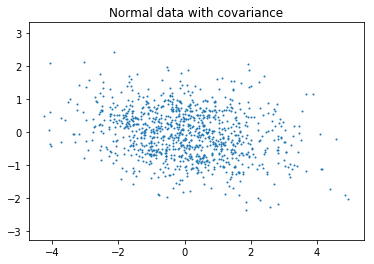

In [101]:
# plot data

#normal
plt.scatter(normalData[:,0],normalData[:,1],s=1)
plt.title('Normal data')
plt.axis('equal')
plt.show()

#uniform
plt.scatter(uniformData[:,0],uniformData[:,1],s=1)
plt.title('Uniform data')
plt.axis('equal')
plt.show()

#normal with cov
plt.scatter(normalDataCov[:,0],normalDataCov[:,1],s=1)
plt.title('Normal data with covariance')
plt.axis('equal')
plt.show()

In [102]:
# create pca and isomap data sets

from sklearn.decomposition import PCA
from sklearn.manifold import Isomap

nrFeaturesKeep = 10
datasets_PCA = []
datasets_ISO = []
for i,X in enumerate(datasets_original):
    pca = PCA(nrFeaturesKeep)
    pca = pca.fit(X)

    isomap = Isomap(n_components=nrFeaturesKeep)
    isomap = isomap.fit(X)

    datasets_PCA.append(pca.transform(X))
    datasets_ISO.append(isomap.transform(X))

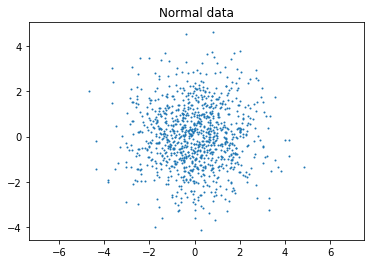

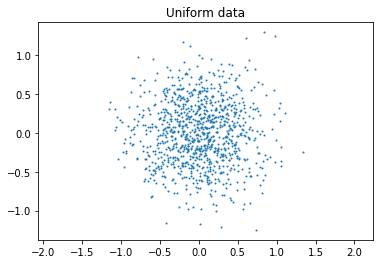

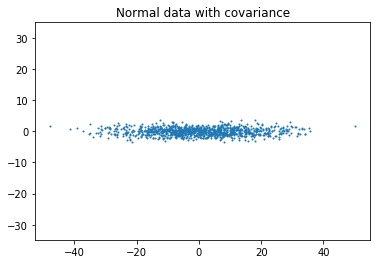

In [103]:
# plot data normal

#normal
plt.scatter(datasets_PCA[0][:,0],datasets_PCA[0][:,1],s=1)
plt.title('Normal data')
plt.axis('equal')
plt.show()

#uniform
plt.scatter(datasets_PCA[1][:,0],datasets_PCA[1][:,1],s=1)
plt.title('Uniform data')
plt.axis('equal')
plt.show()

#normal with cov
plt.scatter(datasets_PCA[2][:,0],datasets_PCA[2][:,1],s=1)
plt.title('Normal data with covariance')
plt.axis('equal')
plt.show()

In [104]:
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import matplotlib

#def k maeans
def Kmeans(X,k=2):
    # Clusters data into k clusters, where k can be a vector of different integers, 
    # in which case clustering is made for each k.
    if isinstance(k, int):
        kmeans = KMeans(n_clusters=k).fit(X)
        return kmeans.labels_, kmeans.inertia_
    
    labels = np.zeros([X.shape[0],len(k)])
    inertia = np.zeros(len(k))
    for i in range(len(k)):
        kmeans = KMeans(n_clusters=k[i]).fit(X)
        labels[:,i] = kmeans.labels_
        inertia[i] = kmeans.inertia_
    
    return labels, inertia


def PlotElbow(inertia,k):
    plt.plot(k,inertia,'.-')

#run k means on data set
K = 5
labels_PCA_normal = []
labels_ISO_normal = []
labels_original_normal = []
for X in datasets_original:
    labels_original.append(Kmeans(X[0], k=K))
for X in datasets_PCA:
    labels_PCA.append(Kmeans(X[0], k=K))
for X in datasets_ISO:
    labels_ISO.append(Kmeans(X[0], k=K))

ValueError: Expected 2D array, got 1D array instead:
array=[-1.26405266  1.52790535 -0.97071094  0.47055962 -0.10069672  0.30379318
 -1.72596243  1.58509537  0.13429659 -1.10685547  1.57822555  0.10749794
 -0.76404783 -0.77518851  1.38384717  0.76038508 -0.28564551  0.53836748
 -2.08389663  0.93778171 -0.005778   -0.46747897 -0.4230153   1.06448209
 -2.9033676   1.61689037  1.42550989 -0.66475512  0.98501786 -1.70046527
 -1.10014381 -1.31564409  0.81050091 -1.04477837 -0.68922937 -0.85275686
  1.11347211 -1.92116972 -0.70140242  0.84908785  1.05069979 -0.53687446
 -0.02919272  1.39405598 -0.39786744  1.01912738  1.8988813  -0.35484964
 -0.38701647 -1.92730539  0.55075659  0.95435581  0.7827765  -1.7932379
  1.2418555   1.70774688  0.3231534  -0.99183439 -1.16328237 -0.0213351
 -1.58199529 -1.24311418 -0.41016902 -1.05507534 -1.05731214 -1.28411722
  0.91312604 -1.38774534  0.03002776 -0.45000776  0.20563314 -0.46002618
 -0.17341299 -0.21665484 -0.25993484  0.56629343  0.99052247 -0.5947633
  0.34346298 -2.58932253 -0.01650232 -0.06609069 -0.1283657  -0.89557729
  0.57509771 -0.49844671 -1.15530009  0.90083869  0.87896131 -1.49493601
 -0.30249371 -1.06379773  1.70472385  0.8774262   1.00256029 -1.04376454
  1.26802778 -0.28202225  0.33168039  0.43706141  0.45502891 -0.37994861
  0.78592756 -0.25853284  0.93214796 -1.39077496 -0.65855285  0.70362944
 -0.9617413   0.95471729  1.02130114  0.73873294 -0.40967783  0.57738073
  0.41657998  0.52145173 -1.47365648 -0.59719649  3.02049595 -0.32610717
 -0.57203115 -0.81497716  0.59964428 -0.37263315  0.43769738  0.51410798
  0.75819357  0.40448786 -1.88418556  0.3644332   0.38476066  0.8130373
  0.58012378 -0.60589163  0.22928708 -1.36815913  1.77474853  0.4052906
  0.15808975  0.15463855 -0.54607899 -0.84989919  0.47323142  0.3801157
 -0.95389653 -1.11171392 -0.42330704 -0.17209306  1.51693007  1.23841216
 -0.3887465  -0.10437829  0.22850879  1.93340251 -0.9245254   0.36668562
  0.59495425  2.07441262 -0.06431477  0.50304305 -0.6389601   0.39805584
 -0.49668004 -0.19036585 -0.78607455 -0.24324387  2.18328304 -1.40853733
 -0.40392631  1.02999534 -0.84491883 -1.47639136  0.05884045  1.99322526
  0.43523388  0.58558141 -0.66651731  0.00542622 -1.7206549   1.67023797
 -0.20513773 -0.04560067 -0.62327534  0.36824554  2.10299292 -0.54051655
  2.18534087 -0.75526173 -1.39366737  0.07987627 -0.78497972  1.96902533
 -0.90378286 -0.31200233 -1.23780465 -1.61088073  1.50873338  0.74340943
 -0.69766875  0.36385457].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

In [98]:
datasets_PCA[0]


array([[-0.21053084, -0.5330387 , -1.13552747, ..., -1.90025453,
        -0.26297387, -0.5700771 ],
       [ 0.6060581 , -1.03578218, -0.17875869, ..., -0.74988449,
        -0.41976555,  1.61812059],
       [ 1.53822136,  1.16331224,  2.20831906, ...,  2.29939364,
         1.16284833, -0.03636431],
       ...,
       [-0.65152505, -0.95163001, -1.18169637, ...,  0.866516  ,
         0.91823318, -1.79454062],
       [-2.21139561,  0.90256714, -0.14937649, ..., -2.05172794,
        -0.46461603,  0.46287654],
       [ 3.25789527,  1.58232938, -0.13817066, ..., -2.33649592,
         0.59515969, -0.10820342]])